# * Kurapati Venkatesh

# * 09012021

# * Topic: Naive Bayes ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## Prepare a classification model using Naive Bayes for Salary dataset, train and test datasets are given separately use both datasets for model building.

## -----------------------------------------------------------------------------------

### Problem Objective:

##### To prepare a classification model using Naive Bayes and To predict the salary of the person is less than 50 K or greater than

### Dataset info:

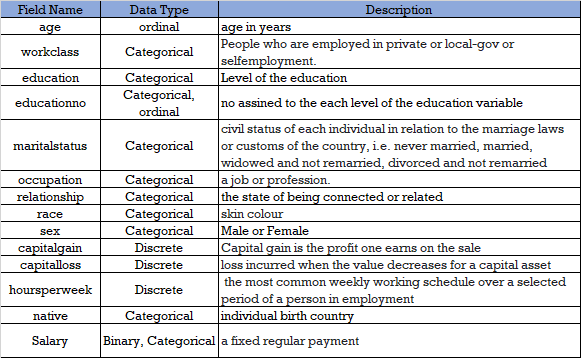

## Import libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Import datasets:

In [3]:
traindf  = pd.read_csv("G:\\360digit\\assignments meterial\\Naivebayes\\SalaryData_Train.csv")
testdf  = pd.read_csv("G:\\360digit\\assignments meterial\\Naivebayes\\SalaryData_Test.csv")

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
df = pd.concat([traindf, testdf])

In [7]:
df.describe(include="all")

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221,45221,45221.000000,45221,45221,45221,45221,45221,45221.000000,45221.000000,45221.000000,45221,45221
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33306,14783,NaN,21055,6020,18666,38902,30527,NaN,NaN,NaN,41292,34013
mean,38.548086,NaN,NaN,10.118463,NaN,NaN,NaN,NaN,NaN,1101.454700,88.548617,40.938038,NaN,NaN
std,13.217981,NaN,NaN,2.552909,NaN,NaN,NaN,NaN,NaN,7506.511295,404.838249,12.007640,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Exploratory data analysis:

In [8]:
# view dimensions of dataset
df.shape

(45221, 14)

We can see that there are 45221 instances and 14 attributes in the data set.

### Rename column names:

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [9]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [10]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


View summary of dataset:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45221 non-null  int64 
 1   workclass       45221 non-null  object
 2   education       45221 non-null  object
 3   education_num   45221 non-null  int64 
 4   marital_status  45221 non-null  object
 5   occupation      45221 non-null  object
 6   relationship    45221 non-null  object
 7   race            45221 non-null  object
 8   sex             45221 non-null  object
 9   capital_gain    45221 non-null  int64 
 10  capital_loss    45221 non-null  int64 
 11  hours_per_week  45221 non-null  int64 
 12  native_country  45221 non-null  object
 13  income          45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


We can see that there are no missing values in the dataset. I will confirm this further.

#### Explore categorical variables:

In [12]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [13]:
# view the categorical variables
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Summary of categorical variables
* There are 9 categorical variables.
* The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.
* income is the target variable.

#### Explore problems within categorical variables
First, I will explore the categorical variables.

##### Missing values in categorical variables:

In [14]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further

#### Frequency counts of categorical variables
Now, I will check the frequency counts of categorical variables.

In [15]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital_status, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales          

In [16]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: marital_status, dtype: float64
 Craft-repair         0.1331

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

In [17]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

We can see that there are no missing values

#### Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [18]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  40  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

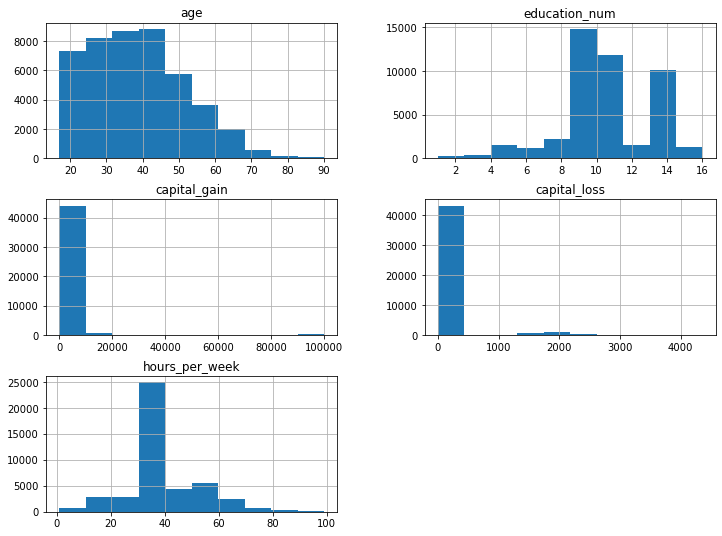

In [19]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,9))
plt.show()

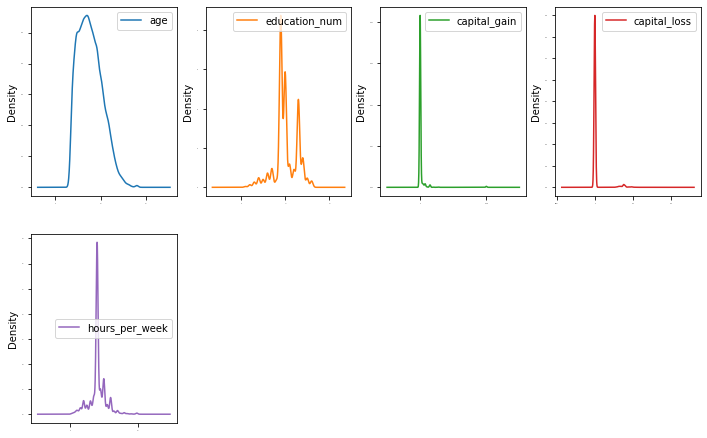

In [20]:
# Density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

### Explore Numerical Variables:

In [21]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [22]:
# view the numerical variables

df[numerical].head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Summary of numerical variables
- There are 6 numerical variables.
- These are given by age, education_num, capital_gain, capital_loss and hours_per_week.
- All of the numerical variables are of discrete data type.

In [23]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values.

## Declare feature vector and target variable:

In [24]:
X = df.drop(['income'], axis=1)

y = df['income']

## Separate training and test set:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3330090002432498, random_state = 0)

In [27]:
X_train.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
23746,53,Self-emp-inc,Some-college,10,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States
13398,36,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,17,United-States
13274,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
13136,31,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,4101,0,40,United-States
26228,40,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States


In [28]:
X_test.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
11225,23,Private,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,45,Germany
5117,40,Private,Some-college,10,Separated,Tech-support,Own-child,White,Female,0,0,32,United-States
26950,45,Private,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States
29133,23,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
11632,31,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States


In [29]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((30162, 13), (15059, 13))

## Feature Engineering :

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [30]:
# check data types in X_train
X_train.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [31]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [32]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#### Encode categorical variables:

In [33]:
# import category encoders
import category_encoders as ce

In [35]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
                           
X_test = encoder.transform(X_test)

In [36]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40
23746,53,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13398,36,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13274,52,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13136,31,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26228,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train.shape

(30162, 102)

We can see that from the initial 14 columns, we now have 103 columns.

###### Similarly, I will take a look at the X_test set.

In [38]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40
11225,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5117,40,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26950,45,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29133,23,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11632,31,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_test.shape

(15059, 102)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

## Feature Scaling:

In [40]:
cols = X_train.columns

In [41]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [43]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [44]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40
0,0.842105,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.789474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

## Model training:

In [45]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results :

In [46]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

## Check accuracy score:

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7991


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

##### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [48]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8015


##### Check for overfitting and underfitting:

In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8015
Test set score: 0.7991


* The training-set accuracy score is 0.8015 while the test-set accuracy to be 0.799. These two values are quite comparable. So, there is no sign of overfitting.

###### Compare model accuracy with null accuracy
* So, the model accuracy is 0.7991. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. 
* Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [51]:
# check class distribution in test set

y_test.value_counts()

 <=50K    11402
 >50K      3657
Name: income, dtype: int64

We can see that the occurences of most frequent class is 11402. So, we can calculate null accuracy by dividing 11402 by total number of occurences.

In [53]:
# check null accuracy score

null_accuracy = (11402/(36577+11402))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.2376


- We can see that our model accuracy score is 0.7991 but null accuracy score is 0.2376. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a ok job in predicting the class labels.


* Now, based on the above analysis we can conclude that our classification model accuracy is appropriate.


- But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


* We have another tool called Confusion matrix that comes to our rescue.

## Confusion matrix:

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

* True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


* True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


* False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.


* False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [54]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9048 2354]
 [ 672 2985]]

True Positives(TP) =  9048

True Negatives(TN) =  2985

False Positives(FP) =  2354

False Negatives(FN) =  672


The confusion matrix shows 9048 + 2985 = 12033 correct predictions and 2354 + 672 = 3026 incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - 9048


* True Negatives (Actual Negative:0 and Predict Negative:0) - 2985


* False Positives (Actual Negative:0 but Predict Positive:1) - 2354 (Type I error)


* False Negatives (Actual Positive:1 but Predict Negative:0) - 672 (Type II error)

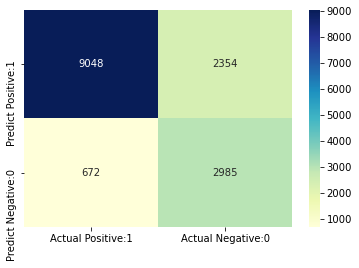

In [55]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices:

##### Classification report:

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86     11402
        >50K       0.56      0.82      0.66      3657

    accuracy                           0.80     15059
   macro avg       0.74      0.80      0.76     15059
weighted avg       0.84      0.80      0.81     15059



##### Classification accuracy:

In [57]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7991


##### Classification error:

In [59]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2009


##### Precision:

Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [60]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7935


##### Recall:

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [61]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9309


##### True Positive Rate:

True Positive Rate is synonymous with Recall.

In [62]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9309


##### False Positive Rate:

In [63]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4409


##### Specificity:

In [64]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5591


##### f1-score:

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#### Support:

* 'Support' is the actual number of occurrences of the class in our dataset.

### Calculate class probabilities:

In [65]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.61793090e-001, 3.82069097e-002],
       [9.99999603e-001, 3.96868504e-007],
       [8.72735112e-001, 1.27264888e-001],
       [9.99999986e-001, 1.40184592e-008],
       [8.15596247e-001, 1.84403753e-001],
       [7.43123113e-001, 2.56876887e-001],
       [9.99935562e-001, 6.44382193e-005],
       [2.04591584e-168, 1.00000000e+000],
       [9.99999955e-001, 4.52617354e-008],
       [9.99967741e-001, 3.22587708e-005]])

### Observations:

* In each row, the numbers sum to 1.


* There are 2 columns which correspond to 2 classes - <=50K and >50K.

      * Class 0 => <=50K - Class that a person makes less than equal to 50K.

      * Class 1 => >50K - Class that a person makes more than 50K.

* Importance of predicted probabilities

      * We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.

* predict_proba process

      * Predicts the probabilities

      * Choose the class with the highest probability

* Classification threshold level

      * There is a classification threshold level of 0.5.

      * Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

      * Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [66]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.617931e-01,3.820691e-02
1,9.999996e-01,3.968685e-07
2,8.727351e-01,1.272649e-01
3,1.000000e+00,1.401846e-08
4,8.155962e-01,1.844038e-01
5,7.431231e-01,2.568769e-01
6,9.999356e-01,6.443822e-05
7,2.045916e-168,1.000000e+00
8,1.000000e+00,4.526174e-08
9,9.999677e-01,3.225877e-05


In [67]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([3.82069097e-02, 3.96868504e-07, 1.27264888e-01, 1.40184592e-08,
       1.84403753e-01, 2.56876887e-01, 6.44382193e-05, 1.00000000e+00,
       4.52617354e-08, 3.22587708e-05])

In [68]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

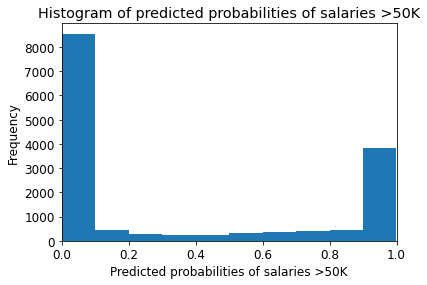

In [69]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

##### Observations:
* We can see that the above histogram is highly positive skewed.


* The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.


* There are relatively small number of observations with probability > 0.5.


* So, these small number of observations predict that the salaries will be >50K.


* Majority of observations predcit that the salaries will be <=50K.

### ROC - AUC:

#### ROC Curve:

* Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.


* The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.


* True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).


* False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).
 

* In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

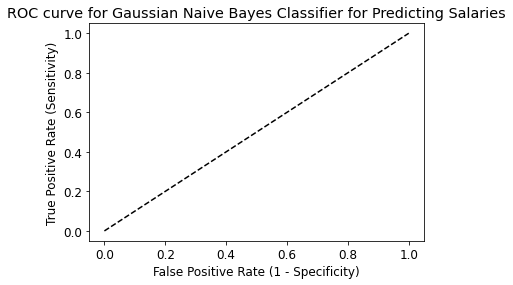

In [79]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Results and conclusion:

1. In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.7991.


2. The training-set accuracy score is 0.7991 while the test-set accuracy to be 0.8015. These two values are quite comparable. So, there is no sign of overfitting.


3. I have compared the model accuracy score which is 0.7991 with null accuracy score which is 0.2376. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a good job in predicting the class labels.


## References:

1. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

2. http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/

3. https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

4. https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

5. https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html